# 2024.0912

This notebook loads MCM-2024 Core $g_n^m, h_n^m$ and their covariance matrix $R$ to display the data traits.

In [1]:
import platform
import sys # python 3.9.16
import os

import numpy             as np # numpy 1.23.2
np.set_printoptions(precision=5, floatmode='fixed', suppress=True)

import pandas            as pd # pandas 2.0.3

import matplotlib        as mpl # matplotlib 3.7.1
import matplotlib.pyplot as plt

print(f"Python Platform: {platform.platform()}")
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f" Numpy {np.__version__}")
print(f"Matplotlib {mpl.__version__}")

Python Platform: macOS-15.5-arm64-arm-64bit
Python 3.9.22 | packaged by conda-forge | (main, Apr 14 2025, 23:36:04) 
[Clang 18.1.8 ]
Pandas 2.1.4
 Numpy 1.23.2
Matplotlib 3.7.1


## coefficients $g_n^m$

In [2]:
coef_src = "../data/raw/Disc-Japan/Core/SW_OPER_MCO_SHA_2Y_19990101T000000_20240731T000000_1001.shc"

### Read the model gauss coefficients
coef_f = open(coef_src, 'r', encoding='ascii')
coef_lines = coef_f.readlines()
coef_f.close()

print(coef_lines)
print(len(coef_lines))

for i in range(0, 7):
    print(i, coef_lines[i])

"""
# Magnetic field model series MCM_2024, version IGRF
# Prior based on CE numerical dynamo model (Aubert et al., 2013, Nature)
# Standard deviations of Gauss coefficients in file *.std
  1 18 105 2 1
       	     1999.1251	     1999.3753	     1999.6254	     1999.8756	     2000.1254	     2000.3749	     2000.6244	     2000.8739	     2001.1237	     2001.3739	     2001.6241	     2001.8742	     2002.1244	     2002.3746	     2002.6247	     2002.8749	     2003.1251	     2003.3753	     2003.6254	     2003.8756	     2004.1254	     2004.3749	     2004.6244	     2004.8739	     2005.1237	     2005.3739	     2005.6241	     2005.8742	     2006.1244	     2006.3746	     2006.6247	     2006.8749	     2007.1251	     2007.3753	     2007.6254	     2007.8756	     2008.1254	     2008.3749	     2008.6244	     2008.8739	     2009.1237	     2009.3739	     2009.6241	     2009.8742	     2010.1244	     2010.3746	     2010.6247	     2010.8749	     2011.1251	     2011.3753	     2011.6254	     2011.8756	     2012.1254	     2012.3749	     2012.6244	     2012.8739	     2013.1237	     2013.3739	     2013.6241	     2013.8742	     2014.1244	     2014.3746	     2014.6247	     2014.8749	     2015.1251	     2015.3753	     2015.6254	     2015.8756	     2016.1254	     2016.3749	     2016.6244	     2016.8739	     2017.1237	     2017.3739	     2017.6241	     2017.8742	     2018.1244	     2018.3746	     2018.6247	     2018.8749	     2019.1251	     2019.3753	     2019.6254	     2019.8756	     2020.1254	     2020.3749	     2020.6244	     2020.8739	     2021.1237	     2021.3739	     2021.6241	     2021.8742	     2022.1244	     2022.3746	     2022.6247	     2022.8749	     2023.1251	     2023.3753	     2023.6254	     2023.8756	     2024.1254	     2024.3749	     2024.6244	     2024.8739	     2025.1237
  1   0	   -29626.3501	   -29622.3077	   -29618.2652	   -29614.3210	   -29610.5241	   -29606.9563	   -29603.5685	   -29600.3444	   -29597.2185	   -29594.2235	   -29591.2612	   -29588.4135	   -29585.6313	   -29582.8654	   -29580.0013	   -29577.1209	   -29574.2405	   -29571.4091	   -29568.4305	   -29565.4028	   -29562.3914	   -29559.3964	   -29556.4342	   -29553.4228	   -29550.3951	   -29547.4492	   -29544.5033	   -29541.6065	   -29538.7097	   -29535.8784	   -29532.9816	   -29530.1012	   -29527.2371	   -29524.3894	   -29521.4762	   -29518.6122	   -29515.7317	   -29512.9659	   -29510.1509	   -29507.3687	   -29504.6028	   -29501.8533	   -29499.1038	   -29496.3543	   -29493.5557	   -29490.7735	   -29488.0076	   -29485.2745	   -29482.5250	   -29479.7755	   -29476.9932	   -29474.1946	   -29471.3142	   -29468.4829	   -29465.6352	   -29462.8530	   -29460.1362	   -29457.4194	   -29454.7354	   -29452.1004	   -29449.5146	   -29446.9451	   -29444.3920	   -29441.9044	   -29439.4495	   -29437.1582	   -29434.8670	   -29432.6575	   -29430.5463	   -29428.5333	   -29426.5039	   -29424.5563	   -29422.7070	   -29420.9231	   -29419.1719	   -29417.4371	   -29415.7023	   -29414.0166	   -29412.3309	   -29410.5797	   -29408.7958	   -29406.9955	   -29405.0971	   -29403.1659	   -29401.1856	   -29399.1725	   -29397.0613	   -29394.8683	   -29392.6425	   -29390.3676	   -29388.0436	   -29385.5560	   -29383.0029	   -29380.3679	   -29377.6184	   -29374.8362	   -29371.9557	   -29369.0099	   -29365.9985	   -29362.9544	   -29359.8939	   -29356.8499	   -29353.7567	   -29350.6635	   -29347.5867
  1   1	    -1738.7567	    -1735.4688	    -1732.2332	    -1729.1253	    -1726.2138	    -1723.3775	    -1720.5888	    -1717.8131	    -1715.0832	    -1712.3337	    -1709.5777	    -1706.8085	    -1704.0656	    -1701.2850	    -1698.4782	    -1695.6452	    -1692.7975	    -1689.9138	    -1686.9270	    -1683.9026	    -1680.8323	    -1677.6311	    -1674.2777	    -1670.7753	    -1667.1355	    -1663.3566	    -1659.5089	    -1655.5483	    -1651.5026	    -1647.3653	    -1643.1183	    -1638.8107	    -1634.5243	    -1630.1837	    -1625.8342	    -1621.4946	    -1617.1910	    -1612.9309	    -1608.7107	    -1604.5627	    -1600.5213	    -1596.5434	    -1592.6343	    -1588.8142	    -1585.0856	    -1581.4229	    -1577.7921	    -1574.1019	    -1570.3274	    -1566.4208	    -1562.3926	    -1558.2409	    -1553.9775	    -1549.5852	    -1545.0855	    -1540.5285	    -1535.9442	    -1531.2846	    -1526.6137	    -1521.9471	    -1517.3469	    -1512.7993	    -1508.3482	    -1504.0119	    -1499.8838	    -1495.9393	    -1492.1846	    -1488.6817	    -1485.4449	    -1482.3741	    -1479.5035	    -1476.8546	    -1474.3734	    -1472.0162	    -1469.7595	    -1467.5477	    -1465.4416	    -1463.3968	    -1461.3682	    -1459.4027	    -1457.5438	    -1455.6938	    -1453.8778	    -1452.1330	    -1450.4447	    -1448.7894	    -1447.1162	    -1445.4324	    -1443.8030	    -1442.1664	    -1440.4825	    -1438.7682	    -1437.0212	    -1435.1244	    -1433.0919	    -1430.9368	    -1428.7145	    -1426.4296	    -1424.0747	    -1421.7037	    -1419.3490	    -1416.9718	    -1414.5887	    -1412.2261	    -1409.8644
  1  -1	     5205.4064	     5200.1054	     5194.7636	     5189.4397	     5184.2091	     5178.9048	     5173.4566	     5167.8954	     5162.3587	     5156.8466	     5151.3640	     5145.9190	     5140.6131	     5135.3400	     5130.0341	     5124.7118	     5119.4109	     5114.0837	     5108.6551	     5103.1217	     5097.5818	     5091.9911	     5086.3596	     5080.7083	     5075.0539	     5069.3437	     5063.5894	     5057.7533	     5051.8533	     5045.8764	     5039.7735	     5033.5560	     5027.2846	     5020.8903	     5014.3521	     5007.6796	     5000.8468	     4993.8388	     4986.6410	     4979.2305	     4971.6661	     4963.9707	     4956.1478	     4948.2446	     4940.3169	     4932.3957	     4924.5252	     4916.6859	     4908.9398	     4901.2248	     4893.5442	     4885.8571	     4878.1814	     4870.5106	     4862.9069	     4855.4522	     4848.1447	     4840.9388	     4833.7884	     4826.7199	     4819.7790	     4812.8922	     4806.0152	     4799.0989	     4792.1466	     4785.0879	     4777.8492	     4770.4370	     4762.9740	     4755.4194	     4747.7650	     4740.1090	     4732.5020	     4724.9180	     4717.3896	     4709.9168	     4702.6061	     4695.4754	     4688.4985	     4681.6968	     4675.1569	     4668.8118	     4662.6009	     4656.5781	     4650.7273	     4645.0548	     4639.4854	     4633.9995	     4628.6151	     4623.3026	     4617.9657	     4612.6156	     4607.3130	     4601.9482	     4596.5163	     4591.0304	     4585.5412	     4580.0847	     4574.6201	     4569.1800	     4563.7939	     4558.4701	     4553.1445	     4547.8485	     4542.5540
"""

['# Magnetic field model series MCM_2024, version IGRF\n', '# Prior based on CE numerical dynamo model (Aubert et al., 2013, Nature)\n', '# Standard deviations of Gauss coefficients in file *.std\n', '  1 18 105 2 1\n', '       \t     1999.1251\t     1999.3753\t     1999.6254\t     1999.8756\t     2000.1254\t     2000.3749\t     2000.6244\t     2000.8739\t     2001.1237\t     2001.3739\t     2001.6241\t     2001.8742\t     2002.1244\t     2002.3746\t     2002.6247\t     2002.8749\t     2003.1251\t     2003.3753\t     2003.6254\t     2003.8756\t     2004.1254\t     2004.3749\t     2004.6244\t     2004.8739\t     2005.1237\t     2005.3739\t     2005.6241\t     2005.8742\t     2006.1244\t     2006.3746\t     2006.6247\t     2006.8749\t     2007.1251\t     2007.3753\t     2007.6254\t     2007.8756\t     2008.1254\t     2008.3749\t     2008.6244\t     2008.8739\t     2009.1237\t     2009.3739\t     2009.6241\t     2009.8742\t     2010.1244\t     2010.3746\t     2010.6247\t     2010.8749\t  

'\n# Magnetic field model series MCM_2024, version IGRF\n# Prior based on CE numerical dynamo model (Aubert et al., 2013, Nature)\n# Standard deviations of Gauss coefficients in file *.std\n  1 18 105 2 1\n       \t     1999.1251\t     1999.3753\t     1999.6254\t     1999.8756\t     2000.1254\t     2000.3749\t     2000.6244\t     2000.8739\t     2001.1237\t     2001.3739\t     2001.6241\t     2001.8742\t     2002.1244\t     2002.3746\t     2002.6247\t     2002.8749\t     2003.1251\t     2003.3753\t     2003.6254\t     2003.8756\t     2004.1254\t     2004.3749\t     2004.6244\t     2004.8739\t     2005.1237\t     2005.3739\t     2005.6241\t     2005.8742\t     2006.1244\t     2006.3746\t     2006.6247\t     2006.8749\t     2007.1251\t     2007.3753\t     2007.6254\t     2007.8756\t     2008.1254\t     2008.3749\t     2008.6244\t     2008.8739\t     2009.1237\t     2009.3739\t     2009.6241\t     2009.8742\t     2010.1244\t     2010.3746\t     2010.6247\t     2010.8749\t     2011.1251\t 

In [3]:
### get time column
times = list(map(float, coef_lines[4].split()))
print(times)

[1999.1251, 1999.3753, 1999.6254, 1999.8756, 2000.1254, 2000.3749, 2000.6244, 2000.8739, 2001.1237, 2001.3739, 2001.6241, 2001.8742, 2002.1244, 2002.3746, 2002.6247, 2002.8749, 2003.1251, 2003.3753, 2003.6254, 2003.8756, 2004.1254, 2004.3749, 2004.6244, 2004.8739, 2005.1237, 2005.3739, 2005.6241, 2005.8742, 2006.1244, 2006.3746, 2006.6247, 2006.8749, 2007.1251, 2007.3753, 2007.6254, 2007.8756, 2008.1254, 2008.3749, 2008.6244, 2008.8739, 2009.1237, 2009.3739, 2009.6241, 2009.8742, 2010.1244, 2010.3746, 2010.6247, 2010.8749, 2011.1251, 2011.3753, 2011.6254, 2011.8756, 2012.1254, 2012.3749, 2012.6244, 2012.8739, 2013.1237, 2013.3739, 2013.6241, 2013.8742, 2014.1244, 2014.3746, 2014.6247, 2014.8749, 2015.1251, 2015.3753, 2015.6254, 2015.8756, 2016.1254, 2016.3749, 2016.6244, 2016.8739, 2017.1237, 2017.3739, 2017.6241, 2017.8742, 2018.1244, 2018.3746, 2018.6247, 2018.8749, 2019.1251, 2019.3753, 2019.6254, 2019.8756, 2020.1254, 2020.3749, 2020.6244, 2020.8739, 2021.1237, 2021.3739, 2021.6241

In [4]:
coef_dfT = pd.DataFrame(columns=["coef"] + times)
display(coef_dfT)

,coef,1999.1251,1999.3753,1999.6254,1999.8756,2000.1254,2000.3749,2000.6244,2000.8739,2001.1237,...,2022.8749,2023.1251,2023.3753,2023.6254,2023.8756,2024.1254,2024.3749,2024.6244,2024.8739,2025.1237


In [5]:
for line in coef_lines[5:]:
    data = list(line.split())

    l, pm = int(data[0]), int(data[1])

    if pm < 0:
        letter = 'h'
    else:
        letter = 'g'
    
    m = abs(pm)
    column = [f"{letter}({l},{m})"] + data[2:]

    column_df = pd.DataFrame([column], columns=coef_dfT.columns)

    coef_dfT = pd.concat([coef_dfT, column_df], ignore_index=True)

coef_dfT = coef_dfT.set_index("coef")
display(coef_dfT)
print(coef_dfT.dtypes)

,1999.1251,1999.3753,1999.6254,1999.8756,2000.1254,2000.3749,2000.6244,2000.8739,2001.1237,2001.3739,...,2022.8749,2023.1251,2023.3753,2023.6254,2023.8756,2024.1254,2024.3749,2024.6244,2024.8739,2025.1237
coef,,,,,,,,,,,,,,,,,,,,,
"g(1,0)",-29626.3501,-29622.3077,-29618.2652,-29614.3210,-29610.5241,-29606.9563,-29603.5685,-29600.3444,-29597.2185,-29594.2235,...,-29374.8362,-29371.9557,-29369.0099,-29365.9985,-29362.9544,-29359.8939,-29356.8499,-29353.7567,-29350.6635,-29347.5867
"g(1,1)",-1738.7567,-1735.4688,-1732.2332,-1729.1253,-1726.2138,-1723.3775,-1720.5888,-1717.8131,-1715.0832,-1712.3337,...,-1430.9368,-1428.7145,-1426.4296,-1424.0747,-1421.7037,-1419.3490,-1416.9718,-1414.5887,-1412.2261,-1409.8644
"h(1,1)",5205.4064,5200.1054,5194.7636,5189.4397,5184.2091,5178.9048,5173.4566,5167.8954,5162.3587,5156.8466,...,4591.0304,4585.5412,4580.0847,4574.6201,4569.1800,4563.7939,4558.4701,4553.1445,4547.8485,4542.5540
"g(2,0)",-2256.4084,-2259.6410,-2262.8226,-2265.9916,-2269.2260,-2272.5571,-2275.9768,-2279.5138,-2283.1332,-2286.8187,...,-2532.0470,-2534.8956,-2537.8086,-2540.7512,-2543.7609,-2546.9156,-2550.1742,-2553.4345,-2556.7289,-2560.0215
"g(2,1)",3069.7206,3069.2677,3068.6983,3068.0681,3067.5847,3067.2293,3066.7530,3066.1264,3065.4129,3064.6502,...,2962.4849,2960.8995,2959.3875,2957.9184,2956.4825,2955.1316,2953.8837,2952.5409,2951.1757,2949.8114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"h(18,16)",0.0190,0.0186,0.0182,0.0178,0.0174,0.0170,0.0166,0.0162,0.0158,0.0154,...,-0.0203,-0.0208,-0.0212,-0.0217,-0.0221,-0.0226,-0.0230,-0.0235,-0.0239,-0.0243
"g(18,17)",0.0287,0.0280,0.0274,0.0267,0.0260,0.0253,0.0246,0.0240,0.0233,0.0226,...,-0.0377,-0.0385,-0.0393,-0.0400,-0.0408,-0.0415,-0.0423,-0.0431,-0.0439,-0.0446
"h(18,17)",-0.0457,-0.0462,-0.0468,-0.0473,-0.0478,-0.0483,-0.0489,-0.0494,-0.0499,-0.0505,...,-0.0923,-0.0927,-0.0931,-0.0935,-0.0939,-0.0943,-0.0947,-0.0950,-0.0954,-0.0958


1999.1251    object
1999.3753    object
1999.6254    object
1999.8756    object
2000.1254    object
              ...  
2024.1254    object
2024.3749    object
2024.6244    object
2024.8739    object
2025.1237    object
Length: 105, dtype: object


In [6]:
coef_df = coef_dfT.T
coef_df.index.name = "YEAR"

idx_cut = 23 # 2024.8739-
coef_df = coef_df.iloc[idx_cut:]
coef_df.loc[2024.8739] = np.nan
coef_df.loc[2025.1237] = np.nan
display(coef_df)
print(coef_df.dtypes)

coef,"g(1,0)","g(1,1)","h(1,1)","g(2,0)","g(2,1)","h(2,1)","g(2,2)","h(2,2)","g(3,0)","g(3,1)",...,"g(18,14)","h(18,14)","g(18,15)","h(18,15)","g(18,16)","h(18,16)","g(18,17)","h(18,17)","g(18,18)","h(18,18)"
YEAR,,,,,,,,,,,,,,,,,,,,,
2004.8739,-29553.4228,-1670.7753,5080.7083,-2335.6589,3048.0896,-2591.6959,1657.7931,-514.0266,1335.4616,-2305.6175,...,-0.0064,0.0005,-0.0463,0.0329,-0.0076,0.0099,0.0129,-0.0581,-0.0036,0.0665
2005.1237,-29550.3951,-1667.1355,5075.0539,-2338.7858,3046.9223,-2597.2615,1657.6168,-516.7902,1335.5345,-2306.6399,...,-0.0064,0.0004,-0.0464,0.0335,-0.0076,0.0095,0.0122,-0.0586,-0.0036,0.0672
2005.3739,-29547.4492,-1663.3566,5069.3437,-2341.9236,3045.7495,-2602.8735,1657.5362,-519.5440,1335.6031,-2307.6496,...,-0.0065,0.0003,-0.0465,0.0341,-0.0075,0.0091,0.0116,-0.0591,-0.0035,0.0678
2005.6241,-29544.5033,-1659.5089,5063.5894,-2345.0317,3044.5419,-2608.5026,1657.5452,-522.2786,1335.6653,-2308.6926,...,-0.0065,0.0002,-0.0466,0.0347,-0.0075,0.0087,0.0109,-0.0597,-0.0035,0.0685
2005.8742,-29541.6065,-1655.5483,5057.7533,-2348.0889,3043.2859,-2614.1667,1657.6893,-524.9307,1335.7333,-2309.7263,...,-0.0066,0.0001,-0.0468,0.0352,-0.0075,0.0084,0.0102,-0.0602,-0.0035,0.0692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024.1254,-29359.8939,-1419.3490,4563.7939,-2546.9156,2955.1316,-3109.7545,1656.1245,-804.9284,1362.6831,-2400.3181,...,-0.0048,-0.0050,-0.0627,0.0695,0.0040,-0.0226,-0.0415,-0.0943,-0.0030,0.1109
2024.3749,-29356.8499,-1416.9718,4558.4701,-2550.1742,2953.8837,-3116.6924,1653.8354,-807.7002,1362.3619,-2401.4963,...,-0.0046,-0.0051,-0.0630,0.0699,0.0042,-0.0230,-0.0423,-0.0947,-0.0030,0.1114
2024.6244,-29353.7567,-1414.5887,4553.1445,-2553.4345,2952.5409,-3123.6447,1651.5634,-810.3119,1361.9789,-2402.7165,...,-0.0045,-0.0051,-0.0633,0.0703,0.0043,-0.0235,-0.0431,-0.0950,-0.0029,0.1119


coef
g(1,0)      object
g(1,1)      object
h(1,1)      object
g(2,0)      object
g(2,1)      object
             ...  
h(18,16)    object
g(18,17)    object
h(18,17)    object
g(18,18)    object
h(18,18)    object
Length: 360, dtype: object


In [7]:
epochs = coef_df.index

print(epochs[13+0::4*4].values) # XXXX.1254
print(epochs[13+1::4*4].values) # XXXX.3749
print(epochs[13+2::4*4].values) # XXXX.6244
print(epochs[13+3::4*4].values, "<-- 2028 % 4 == 0") # XXXX.8739
print()
print(epochs[13+4::4*4].values) # XXXX.1237
print(epochs[13+5::4*4].values) # XXXX.3739
print(epochs[13+6::4*4].values) # XXXX.6241
print(epochs[13+7::4*4].values, "<-- 2025 % 4 == 1") # XXXX.8742
print()
print(epochs[13+ 8::4*4].values) # XXXX.1244
print(epochs[13+ 9::4*4].values) # XXXX.3746
print(epochs[13+10::4*4].values) # XXXX.6247
print(epochs[13+11::4*4].values, "<-- 2026 % 4 == 2") # XXXX.8742

[2008.1254 2012.1254 2016.1254 2020.1254 2024.1254]
[2008.3749 2012.3749 2016.3749 2020.3749 2024.3749]
[2008.6244 2012.6244 2016.6244 2020.6244 2024.6244]
[2008.8739 2012.8739 2016.8739 2020.8739 2024.8739] <-- 2028 % 4 == 0

[2009.1237 2013.1237 2017.1237 2021.1237 2025.1237]
[2009.3739 2013.3739 2017.3739 2021.3739]
[2009.6241 2013.6241 2017.6241 2021.6241]
[2009.8742 2013.8742 2017.8742 2021.8742] <-- 2025 % 4 == 1

[2010.1244 2014.1244 2018.1244 2022.1244]
[2010.3746 2014.3746 2018.3746 2022.3746]
[2010.6247 2014.6247 2018.6247 2022.6247]
[2010.8749 2014.8749 2018.8749 2022.8749] <-- 2026 % 4 == 2


In [8]:
coef_df_ext = coef_df.copy()

for ext_e in range(2025, 2031):
    idx = (ext_e%4) * 4
    epoch_l = epochs[13 + idx : 13 + idx+4]
    print(ext_e, epoch_l, "<--", ext_e%4)
    e_int = int(epoch_l[0])
    e_frac_l = [epoch - e_int for epoch in epoch_l]

    for e_frac in e_frac_l:
        coef_df_ext.loc[ext_e + e_frac] = np.nan

print(coef_df_ext.index[-30:])
display(coef_df_ext)

2025 Index([2009.1237, 2009.3739, 2009.6241, 2009.8742], dtype='object', name='YEAR') <-- 1
2026 Index([2010.1244, 2010.3746, 2010.6247, 2010.8749], dtype='object', name='YEAR') <-- 2
2027 Index([2011.1251, 2011.3753, 2011.6254, 2011.8756], dtype='object', name='YEAR') <-- 3
2028 Index([2008.1254, 2008.3749, 2008.6244, 2008.8739], dtype='object', name='YEAR') <-- 0
2029 Index([2009.1237, 2009.3739, 2009.6241, 2009.8742], dtype='object', name='YEAR') <-- 1
2030 Index([2010.1244, 2010.3746, 2010.6247, 2010.8749], dtype='object', name='YEAR') <-- 2
Index([2023.6254, 2023.8756, 2024.1254, 2024.3749, 2024.6244, 2024.8739,
       2025.1237, 2025.3739, 2025.6241, 2025.8742, 2026.1244, 2026.3746,
       2026.6247, 2026.8749, 2027.1251, 2027.3753, 2027.6254, 2027.8756,
       2028.1254, 2028.3749, 2028.6244, 2028.8739, 2029.1237, 2029.3739,
       2029.6241, 2029.8742, 2030.1244, 2030.3746, 2030.6247, 2030.8749],
      dtype='float64', name='YEAR')


coef,"g(1,0)","g(1,1)","h(1,1)","g(2,0)","g(2,1)","h(2,1)","g(2,2)","h(2,2)","g(3,0)","g(3,1)",...,"g(18,14)","h(18,14)","g(18,15)","h(18,15)","g(18,16)","h(18,16)","g(18,17)","h(18,17)","g(18,18)","h(18,18)"
YEAR,,,,,,,,,,,,,,,,,,,,,
2004.8739,-29553.4228,-1670.7753,5080.7083,-2335.6589,3048.0896,-2591.6959,1657.7931,-514.0266,1335.4616,-2305.6175,...,-0.0064,0.0005,-0.0463,0.0329,-0.0076,0.0099,0.0129,-0.0581,-0.0036,0.0665
2005.1237,-29550.3951,-1667.1355,5075.0539,-2338.7858,3046.9223,-2597.2615,1657.6168,-516.7902,1335.5345,-2306.6399,...,-0.0064,0.0004,-0.0464,0.0335,-0.0076,0.0095,0.0122,-0.0586,-0.0036,0.0672
2005.3739,-29547.4492,-1663.3566,5069.3437,-2341.9236,3045.7495,-2602.8735,1657.5362,-519.5440,1335.6031,-2307.6496,...,-0.0065,0.0003,-0.0465,0.0341,-0.0075,0.0091,0.0116,-0.0591,-0.0035,0.0678
2005.6241,-29544.5033,-1659.5089,5063.5894,-2345.0317,3044.5419,-2608.5026,1657.5452,-522.2786,1335.6653,-2308.6926,...,-0.0065,0.0002,-0.0466,0.0347,-0.0075,0.0087,0.0109,-0.0597,-0.0035,0.0685
2005.8742,-29541.6065,-1655.5483,5057.7533,-2348.0889,3043.2859,-2614.1667,1657.6893,-524.9307,1335.7333,-2309.7263,...,-0.0066,0.0001,-0.0468,0.0352,-0.0075,0.0084,0.0102,-0.0602,-0.0035,0.0692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029.8742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030.1244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030.3746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# import csv

# coef_df_ext.to_csv("../MCM2024/processed/coef_g.csv", index=True, quoting=csv.QUOTE_NONNUMERIC)

### differential data

In [10]:
g = pd.read_csv("../data/processed/coef_g.csv")
g = g.set_index("YEAR")
g.index = g.index.astype(float)

display(g)
display(g.describe())

,"g(1,0)","g(1,1)","h(1,1)","g(2,0)","g(2,1)","h(2,1)","g(2,2)","h(2,2)","g(3,0)","g(3,1)",...,"g(18,14)","h(18,14)","g(18,15)","h(18,15)","g(18,16)","h(18,16)","g(18,17)","h(18,17)","g(18,18)","h(18,18)"
YEAR,,,,,,,,,,,,,,,,,,,,,
2004.8739,-29553.4228,-1670.7753,5080.7083,-2335.6589,3048.0896,-2591.6959,1657.7931,-514.0266,1335.4616,-2305.6175,...,-0.0064,0.0005,-0.0463,0.0329,-0.0076,0.0099,0.0129,-0.0581,-0.0036,0.0665
2005.1237,-29550.3951,-1667.1355,5075.0539,-2338.7858,3046.9223,-2597.2615,1657.6168,-516.7902,1335.5345,-2306.6399,...,-0.0064,0.0004,-0.0464,0.0335,-0.0076,0.0095,0.0122,-0.0586,-0.0036,0.0672
2005.3739,-29547.4492,-1663.3566,5069.3437,-2341.9236,3045.7495,-2602.8735,1657.5362,-519.5440,1335.6031,-2307.6496,...,-0.0065,0.0003,-0.0465,0.0341,-0.0075,0.0091,0.0116,-0.0591,-0.0035,0.0678
2005.6241,-29544.5033,-1659.5089,5063.5894,-2345.0317,3044.5419,-2608.5026,1657.5452,-522.2786,1335.6653,-2308.6926,...,-0.0065,0.0002,-0.0466,0.0347,-0.0075,0.0087,0.0109,-0.0597,-0.0035,0.0685
2005.8742,-29541.6065,-1655.5483,5057.7533,-2348.0889,3043.2859,-2614.1667,1657.6893,-524.9307,1335.7333,-2309.7263,...,-0.0066,0.0001,-0.0468,0.0352,-0.0075,0.0084,0.0102,-0.0602,-0.0035,0.0692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029.8742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030.1244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030.3746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,"g(1,0)","g(1,1)","h(1,1)","g(2,0)","g(2,1)","h(2,1)","g(2,2)","h(2,2)","g(3,0)","g(3,1)",...,"g(18,14)","h(18,14)","g(18,15)","h(18,15)","g(18,16)","h(18,16)","g(18,17)","h(18,17)","g(18,18)","h(18,18)"
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,-29449.722040,-1523.159421,4807.844574,-2444.537346,3006.115069,-2845.429550,1669.822845,-650.344974,1350.300099,-2352.379821,...,-0.006971,-0.002825,-0.053135,0.053004,-0.002278,-0.005999,-0.014351,-0.077689,-0.003939,0.090715
std,56.561829,78.346957,162.226763,62.210852,27.392792,159.797635,7.729759,90.823830,10.834812,29.738015,...,0.000940,0.001752,0.005108,0.010879,0.003796,0.009897,0.016471,0.010973,0.000477,0.013406
min,-29553.422800,-1670.775300,4553.144500,-2553.434500,2952.540900,-3123.644700,1651.563400,-810.311900,1335.461600,-2402.716500,...,-0.007900,-0.005100,-0.063300,0.032900,-0.007600,-0.023500,-0.043100,-0.095000,-0.004600,0.066500
25%,-29497.041675,-1589.769225,4661.095200,-2496.332025,2984.140550,-2982.386850,1663.990275,-727.395875,1339.180300,-2378.861500,...,-0.007725,-0.004425,-0.057275,0.043975,-0.005825,-0.014425,-0.028275,-0.087200,-0.004400,0.079450
50%,-29443.148200,-1506.180050,4802.557050,-2443.799200,3013.384450,-2838.890100,1670.923700,-638.563900,1350.044850,-2350.793650,...,-0.007250,-0.003150,-0.052000,0.053950,-0.002450,-0.005400,-0.013850,-0.078450,-0.003950,0.091700
75%,-29404.614300,-1453.441600,4950.220400,-2394.121600,3026.673675,-2703.826025,1676.731600,-573.115825,1362.049425,-2325.787500,...,-0.006500,-0.001300,-0.048675,0.062200,0.001025,0.002575,-0.000225,-0.068375,-0.003500,0.102325
max,-29353.756700,-1414.588700,5080.708300,-2335.658900,3048.089600,-2591.695900,1679.802800,-514.026600,1364.358300,-2305.617500,...,-0.004500,0.000500,-0.046300,0.070300,0.004300,0.009900,0.012900,-0.058100,-0.002900,0.111900


In [11]:
inv_dt = 4.0 # dt = 365.25 days / 4 ~= 0.25 year

### make differential data
d0g_dt0 = g
d1g_dt1 = d0g_dt0.diff(1, "index") * inv_dt
d2g_dt2 = d1g_dt1.diff(1, "index") * inv_dt
d3g_dt3 = d2g_dt2.diff(1, "index") * inv_dt
d4g_dt4 = d3g_dt3.diff(1, "index") * inv_dt

display(d2g_dt2)

,"g(1,0)","g(1,1)","h(1,1)","g(2,0)","g(2,1)","h(2,1)","g(2,2)","h(2,2)","g(3,0)","g(3,1)",...,"g(18,14)","h(18,14)","g(18,15)","h(18,15)","g(18,16)","h(18,16)","g(18,17)","h(18,17)","g(18,18)","h(18,18)"
YEAR,,,,,,,,,,,,,,,,,,,,,
2004.8739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005.1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005.3739,-1.308800e+00,2.2256,-0.8928,-0.1744,-0.0880,-0.7424,1.5312,0.1568,-0.0688,0.2032,...,-0.0016,-8.673617e-19,-1.110223e-16,-1.110223e-16,0.0016,2.775558e-17,0.0016,0.0000,0.0016,-1.600000e-03
2005.6241,-5.820766e-11,1.1008,-0.7056,0.4752,-0.5568,-0.2736,1.4336,0.3072,-0.1024,-0.5328,...,0.0016,1.301043e-18,0.000000e+00,1.110223e-16,-0.0016,-2.775558e-17,-0.0016,-0.0016,-0.0016,1.600000e-03
2005.8742,-7.856000e-01,1.8064,-1.3088,0.8144,-0.7744,-0.5600,2.1616,1.3200,0.0928,0.1488,...,-0.0016,-6.505213e-19,-1.600000e-03,-1.600000e-03,0.0000,1.600000e-03,0.0000,0.0016,0.0000,-2.220446e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029.8742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030.1244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2030.3746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# import csv

# d1g_dt1.to_csv("../MCM2024/processed/coef_d1g.csv", index=True, quoting=csv.QUOTE_NONNUMERIC)
# d2g_dt2.to_csv("../MCM2024/processed/coef_d2g.csv", index=True, quoting=csv.QUOTE_NONNUMERIC)
# d3g_dt3.to_csv("../MCM2024/processed/coef_d3g.csv", index=True, quoting=csv.QUOTE_NONNUMERIC)
# d4g_dt4.to_csv("../MCM2024/processed/coef_d4g.csv", index=True, quoting=csv.QUOTE_NONNUMERIC)

# covariances $R$

In [13]:
### CAUTION!! FILE SIZE TOO BIG
cvar_src = "../data/raw/Disc-Japan/Core/SW_OPER_MCO_SHA_2Y_19990101T000000_20240731T000000_1001.cov"

### Read the model gauss coefficients
cvar_f = open(cvar_src, 'r', encoding='ascii')

line = cvar_f.readline()
print(0, line)

line = cvar_f.readline()
print(1, line)

line = cvar_f.readline()
print(2, line)

line = cvar_f.readline()
print(3, line)

line = cvar_f.readline()
print(4, line)

line = cvar_f.readline()
print(5, line)

cvar_f.close()


"""
#  Upper triangle of the covariance matrix
#  Format
#   First line  : dates
#   Other lines : cov matrix row number, column number, values for the given dates
	      1999.125	      1999.375	      1999.625	      1999.876	      2000.125	      2000.375	      2000.624	      2000.874	      2001.124	      2001.374	      2001.624	      2001.874	      2002.124	      2002.375	      2002.625	      2002.875	      2003.125	      2003.375	      2003.625	      2003.876	      2004.125	      2004.375	      2004.624	      2004.874	      2005.124	      2005.374	      2005.624	      2005.874	      2006.124	      2006.375	      2006.625	      2006.875	      2007.125	      2007.375	      2007.625	      2007.876	      2008.125	      2008.375	      2008.624	      2008.874	      2009.124	      2009.374	      2009.624	      2009.874	      2010.124	      2010.375	      2010.625	      2010.875	      2011.125	      2011.375	      2011.625	      2011.876	      2012.125	      2012.375	      2012.624	      2012.874	      2013.124	      2013.374	      2013.624	      2013.874	      2014.124	      2014.375	      2014.625	      2014.875	      2015.125	      2015.375	      2015.625	      2015.876	      2016.125	      2016.375	      2016.624	      2016.874	      2017.124	      2017.374	      2017.624	      2017.874	      2018.124	      2018.375	      2018.625	      2018.875	      2019.125	      2019.375	      2019.625	      2019.876	      2020.125	      2020.375	      2020.624	      2020.874	      2021.124	      2021.374	      2021.624	      2021.874	      2022.124	      2022.375	      2022.625	      2022.875	      2023.125	      2023.375	      2023.625	      2023.876	      2024.125	      2024.375	      2024.624	      2024.874	      2025.124
   1    1	  0.0825219904	  0.0578740622	  0.0435895102	  0.0359387033	  0.0321875529	  0.0303008637	  0.0290884522	  0.0279974023	  0.0270659559	  0.0262683745	  0.0256033883	  0.0250692017	  0.0246491338	  0.0243348446	  0.0241111080	  0.0239494341	  0.0238302372	  0.0237549759	  0.0237073287	  0.0236807680	  0.0236687715	  0.0236621145	  0.0236496423	  0.0236429093	  0.0236389478	  0.0236319691	  0.0236251065	  0.0236219708	  0.0236153744	  0.0236077919	  0.0236093846	  0.0236125295	  0.0236042542	  0.0236010124	  0.0236001792	  0.0235961196	  0.0235940122	  0.0235995629	  0.0236037617	  0.0236069630	  0.0236213991	  0.0236425612	  0.0236583187	  0.0236819268	  0.0237245330	  0.0237811425	  0.0238608473	  0.0239756273	  0.0240889278	  0.0242157921	  0.0243455872	  0.0244625158	  0.0245482190	  0.0244704079	  0.0243556668	  0.0242303177	  0.0241015329	  0.0239901667	  0.0238923713	  0.0238098989	  0.0237553159	  0.0237180193	  0.0237004707	  0.0236929541	  0.0236840593	  0.0236805463	  0.0236820320	  0.0236785328	  0.0236735888	  0.0236728430	  0.0236699722	  0.0236679786	  0.0236692801	  0.0236687916	  0.0236678986	  0.0236703074	  0.0236695397	  0.0236672344	  0.0236699594	  0.0236755580	  0.0236800577	  0.0236898385	  0.0237031104	  0.0237174692	  0.0237442586	  0.0237815104	  0.0238275119	  0.0238920215	  0.0239762245	  0.0240711348	  0.0241759384	  0.0242835538	  0.0243782667	  0.0244563574	  0.0245296405	  0.0246407547	  0.0249207825	  0.0256715412	  0.0274607214	  0.0313059948	  0.0388904784	  0.0527445614	  0.0763294872	  0.1137607977	  0.1683728702
"""

0 #  Upper triangle of the covariance matrix

1 #  Format

2 #   First line  : dates

3 #   Other lines : cov matrix row number, column number, values for the given dates

4 	      1999.125	      1999.375	      1999.625	      1999.876	      2000.125	      2000.375	      2000.624	      2000.874	      2001.124	      2001.374	      2001.624	      2001.874	      2002.124	      2002.375	      2002.625	      2002.875	      2003.125	      2003.375	      2003.625	      2003.876	      2004.125	      2004.375	      2004.624	      2004.874	      2005.124	      2005.374	      2005.624	      2005.874	      2006.124	      2006.375	      2006.625	      2006.875	      2007.125	      2007.375	      2007.625	      2007.876	      2008.125	      2008.375	      2008.624	      2008.874	      2009.124	      2009.374	      2009.624	      2009.874	      2010.124	      2010.375	      2010.625	      2010.875	      2011.125	      2011.375	      2011.625	      2011.876	      2012.125	      2012.375	      2012.624	

'\n#  Upper triangle of the covariance matrix\n#  Format\n#   First line  : dates\n#   Other lines : cov matrix row number, column number, values for the given dates\n\t      1999.125\t      1999.375\t      1999.625\t      1999.876\t      2000.125\t      2000.375\t      2000.624\t      2000.874\t      2001.124\t      2001.374\t      2001.624\t      2001.874\t      2002.124\t      2002.375\t      2002.625\t      2002.875\t      2003.125\t      2003.375\t      2003.625\t      2003.876\t      2004.125\t      2004.375\t      2004.624\t      2004.874\t      2005.124\t      2005.374\t      2005.624\t      2005.874\t      2006.124\t      2006.375\t      2006.625\t      2006.875\t      2007.125\t      2007.375\t      2007.625\t      2007.876\t      2008.125\t      2008.375\t      2008.624\t      2008.874\t      2009.124\t      2009.374\t      2009.624\t      2009.874\t      2010.124\t      2010.375\t      2010.625\t      2010.875\t      2011.125\t      2011.375\t      2011.625\t      2011.876\

In [14]:
### Read the model gauss coefficients
cvar_f = open(cvar_src, 'r', encoding='ascii')

line = cvar_f.readline() #  Upper triangle of the covariance matrix
line = cvar_f.readline() #  Format
line = cvar_f.readline() #   First line  : dates
line = cvar_f.readline() #   Other lines : cov matrix row number, column number, values for the given dates
line = cvar_f.readline() #  1999.125...

# 時間の行を取得
times = list(map(float, line.split()))
print(times)

[1999.125, 1999.375, 1999.625, 1999.876, 2000.125, 2000.375, 2000.624, 2000.874, 2001.124, 2001.374, 2001.624, 2001.874, 2002.124, 2002.375, 2002.625, 2002.875, 2003.125, 2003.375, 2003.625, 2003.876, 2004.125, 2004.375, 2004.624, 2004.874, 2005.124, 2005.374, 2005.624, 2005.874, 2006.124, 2006.375, 2006.625, 2006.875, 2007.125, 2007.375, 2007.625, 2007.876, 2008.125, 2008.375, 2008.624, 2008.874, 2009.124, 2009.374, 2009.624, 2009.874, 2010.124, 2010.375, 2010.625, 2010.875, 2011.125, 2011.375, 2011.625, 2011.876, 2012.125, 2012.375, 2012.624, 2012.874, 2013.124, 2013.374, 2013.624, 2013.874, 2014.124, 2014.375, 2014.625, 2014.875, 2015.125, 2015.375, 2015.625, 2015.876, 2016.125, 2016.375, 2016.624, 2016.874, 2017.124, 2017.374, 2017.624, 2017.874, 2018.124, 2018.375, 2018.625, 2018.875, 2019.125, 2019.375, 2019.625, 2019.876, 2020.125, 2020.375, 2020.624, 2020.874, 2021.124, 2021.374, 2021.624, 2021.874, 2022.124, 2022.375, 2022.625, 2022.875, 2023.125, 2023.375, 2023.625, 2023.876,

In [15]:
J = 360
N = len(times)

R_triu = np.zeros((J+1, J+1, N), dtype=np.float64)
R_full = np.zeros((J+1, J+1, N), dtype=np.float64)

R_full[:, :, :] = np.nan
R_triu[:, :, :] = np.nan
R_full[0, 0, :] = times
R_triu[0, 0, :] = times
R_full[1:, 1:, :] = 0.0
R_triu[1:, 1:, :] = 0.0

print(R_triu[0:5, 0:5, 0])
print(R_full[0:5, 0:5, 0])

[[1999.12500        nan        nan        nan        nan]
 [       nan    0.00000    0.00000    0.00000    0.00000]
 [       nan    0.00000    0.00000    0.00000    0.00000]
 [       nan    0.00000    0.00000    0.00000    0.00000]
 [       nan    0.00000    0.00000    0.00000    0.00000]]
[[1999.12500        nan        nan        nan        nan]
 [       nan    0.00000    0.00000    0.00000    0.00000]
 [       nan    0.00000    0.00000    0.00000    0.00000]
 [       nan    0.00000    0.00000    0.00000    0.00000]
 [       nan    0.00000    0.00000    0.00000    0.00000]]


In [16]:
line = cvar_f.readline()
while line:
    l = list(map(float, line.split()))
    i, j = int(l[0]), int(l[1]) # CAUTION!! 1-indexed

    R_triu[i, j, :] = l[2:]

    line = cvar_f.readline()

cvar_f.close()

print(R_triu[0:5, 0:5, 0])
print()
print(R_triu[0:5, 0:5, 1])

[[1999.12500        nan        nan        nan        nan]
 [       nan    0.08252   -0.00041   -0.00048    0.00155]
 [       nan    0.00000    0.04309   -0.00071   -0.00043]
 [       nan    0.00000    0.00000    0.05400    0.00070]
 [       nan    0.00000    0.00000    0.00000    0.04040]]

[[1999.37500        nan        nan        nan        nan]
 [       nan    0.05787   -0.00013   -0.00034    0.00037]
 [       nan    0.00000    0.02673   -0.00035   -0.00020]
 [       nan    0.00000    0.00000    0.03395    0.00039]
 [       nan    0.00000    0.00000    0.00000    0.02550]]


In [17]:
for it in range(N):
    Rt_triu = R_triu[:, :, it]
    Rt_tril = Rt_triu.T
    Rt_diag = np.diag(Rt_triu.diagonal())
    
    Rt = Rt_triu + Rt_tril - Rt_diag
    R_full[:, :, it] = Rt

R = R_full[:, :, idx_cut:-2]
print(R[0:5, 0:5, 0])
print()
print(R[0:5, 0:5, 1])
print()
print(R[0:5, 0:5, -1])

[[2004.87400        nan        nan        nan        nan]
 [       nan    0.02364   -0.00023   -0.00007    0.00108]
 [       nan   -0.00023    0.01337   -0.00007   -0.00003]
 [       nan   -0.00007   -0.00007    0.01646    0.00010]
 [       nan    0.00108   -0.00003    0.00010    0.01203]]

[[2005.12400        nan        nan        nan        nan]
 [       nan    0.02364   -0.00023   -0.00007    0.00108]
 [       nan   -0.00023    0.01337   -0.00007   -0.00003]
 [       nan   -0.00007   -0.00007    0.01646    0.00010]
 [       nan    0.00108   -0.00003    0.00010    0.01203]]

[[2024.62400        nan        nan        nan        nan]
 [       nan    0.07633   -0.00042   -0.00027    0.00214]
 [       nan   -0.00042    0.03951    0.00006   -0.00006]
 [       nan   -0.00027    0.00006    0.05015    0.00019]
 [       nan    0.00214   -0.00006    0.00019    0.03691]]


In [18]:
# np.save("../MCM2024/processed/cvar_R.npy", R)

### differential data

In [19]:
L = len(R[0, 0, :])

d1R = np.zeros(R.shape)
d1R[:, :, :] = np.nan
for it in range(1, L):
    d1R[:, :, it] = ( R[:, :, it] + R[:, :, it-1] ) * inv_dt**(1*2)
d1R[0, 0, :] = R[0, 0, :]

d2R = np.zeros(R.shape)
d2R[:, :, :] = np.nan
for it in range(2, L):
    d2R[:, :, it] = ( R[:, :, it] + (2*2) * R[:, :, it-1] + R[:, :, it-2] ) * inv_dt**(2*2)
d2R[0, 0, :] = R[0, 0, :]

d3R = np.zeros(R.shape)
d3R[:, :, :] = np.nan
for it in range(3, L):
    d3R[:, :, it] = ( R[:, :, it] + (3*3) * R[:, :, it-1] + (3*3) * R[:, :, it-2] + R[:, :, it-3] ) * inv_dt**(3*2)
d3R[0, 0, :] = R[0, 0, :]

d4R = np.zeros(R.shape)
d4R[:, :, :] = np.nan
for it in range(4, L):
    d4R[:, :, it] = ( R[:, :, it] + (4*4) * R[:, :, it-1] + (6*6) * R[:, :, it-2] + (4*4) * R[:, :, it-3] + R[:, :, it-4] ) * inv_dt**(4*2)
d4R[0, 0, :] = R[0, 0, :]

print(d2R[:5, :5, 0])
print(d2R[:5, :5, 1])
print(d2R[:5, :5, 2])
print(d2R[:5, :5, -1])

print(R[:5, :5, -1])

[[2004.87400        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]]
[[2005.12400        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]]
[[2005.37400        nan        nan        nan        nan]
 [       nan   36.30865   -0.34635   -0.11209    1.66008]
 [       nan   -0.34635   20.52914   -0.11124   -0.04573]
 [       nan   -0.11209   -0.11124   25.27605    0.14777]
 [       nan    1.66008   -0.04573    0.14777   18.48007]]
[[2024.62400        nan        nan        nan        nan]
 [       nan   83.50674   -0.27826   -0.16526    1.55067]
 [       na

In [20]:
# np.save("../MCM2024/processed/cvar_d1R.npy", d1R)
# np.save("../MCM2024/processed/cvar_d2R.npy", d2R)
# np.save("../MCM2024/processed/cvar_d3R.npy", d3R)
# np.save("../MCM2024/processed/cvar_d4R.npy", d4R)

## Display data error covariance

In [21]:
L_full = len(R_full[0, 0, :])

d1R_full = np.zeros(R_full.shape)
d1R_full[:, :, :] = np.nan
for it in range(1, L_full):
    d1R_full[:, :, it] = ( R_full[:, :, it] + R_full[:, :, it-1] ) * inv_dt**(1*2)
d1R_full[0, 0, :] = R_full[0, 0, :]

d2R_full = np.zeros(R_full.shape)
d2R_full[:, :, :] = np.nan
for it in range(2, L_full):
    d2R_full[:, :, it] = ( R_full[:, :, it] + (2*2) * R_full[:, :, it-1] + R_full[:, :, it-2] ) * inv_dt**(2*2)
d2R_full[0, 0, :] = R_full[0, 0, :]

d3R_full = np.zeros(R_full.shape)
d3R_full[:, :, :] = np.nan
for it in range(3, L_full):
    d3R_full[:, :, it] = ( R_full[:, :, it] + (3*3) * R_full[:, :, it-1] + (3*3) * R_full[:, :, it-2] + R_full[:, :, it-3] ) * inv_dt**(3*2)
d3R_full[0, 0, :] = R_full[0, 0, :]

d4R_full = np.zeros(R_full.shape)
d4R_full[:, :, :] = np.nan
for it in range(4, L_full):
    d4R_full[:, :, it] = ( R_full[:, :, it] + (4*4) * R_full[:, :, it-1] + (6*6) * R_full[:, :, it-2] + (4*4) * R_full[:, :, it-3] + R_full[:, :, it-4] ) * inv_dt**(4*2)
d4R_full[0, 0, :] = R_full[0, 0, :]

print(d2R_full[:5, :5, 0])
print(d2R_full[:5, :5, 1])
print(d2R_full[:5, :5, 2])
print(d2R_full[:5, :5, -1])

print(R_full[:5, :5, -1])

[[1999.12500        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]]
[[1999.37500        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]
 [       nan        nan        nan        nan        nan]]
[[1999.62500        nan        nan        nan        nan]
 [       nan   91.54758   -0.25934   -0.55393    0.83683]
 [       nan   -0.25934   43.43921   -0.60139   -0.33911]
 [       nan   -0.55393   -0.60139   54.94892    0.62547]
 [       nan    0.83683   -0.33911    0.62547   41.12422]]
[[2025.12400        nan        nan        nan        nan]
 [       nan  179.13486   -1.89257   -1.09134    9.02082]
 [       na

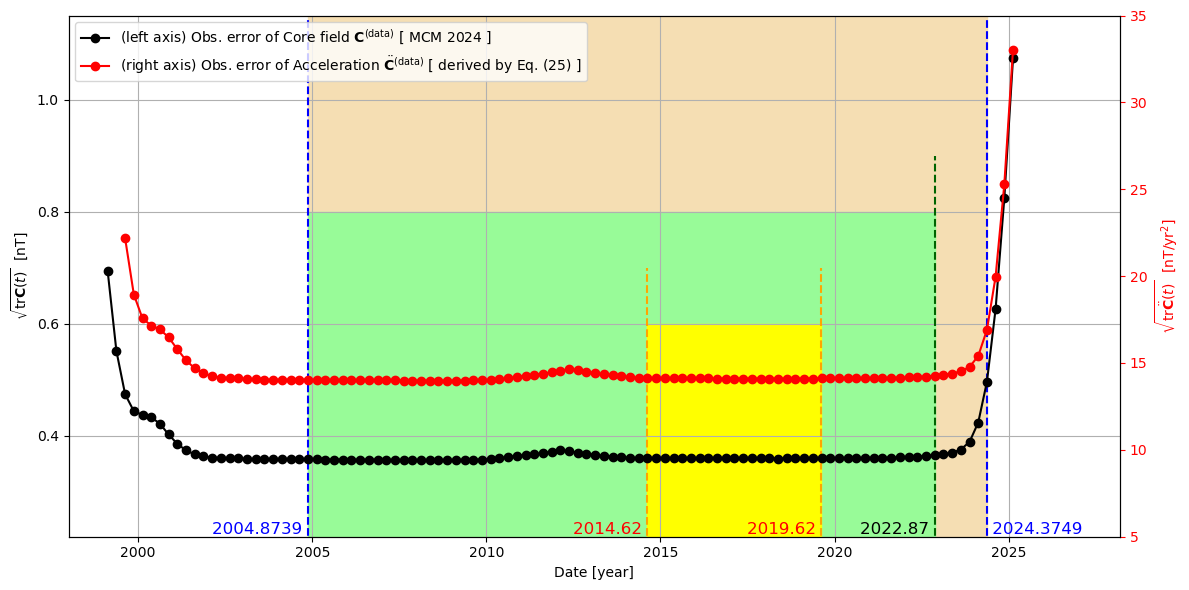

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 6))


# colorize the data range
y0lim, y0max = 0.22, 1.15
epoch1 = 2004.8739
epoch2 = 2024.3749
ax.vlines(epoch1, 0.0, 1.2, color='blue', linestyle='--')
ax.vlines(epoch2, 0.0, 1.2, color='blue', linestyle='--')
ax.fill_between([epoch1, epoch2], 0.0, 1.2, color='wheat', alpha=1.0)
ax.text(epoch1, y0lim, f"{epoch1} ", ha='right', va='bottom', color='blue', fontsize=12)
ax.text(epoch2, y0lim, f" {epoch2}", ha='left',  va='bottom', color='blue', fontsize=12)

epoch3 = 2022.87
ax.vlines(epoch3, 0.0, 0.9, color='darkgreen', linestyle='--')
ax.fill_between([epoch1, epoch3], 0.0, 0.8, color='palegreen', alpha=1.0)
ax.text(epoch3, y0lim, f"{epoch3} ", ha='right', va='bottom', color='black', fontsize=12)

epochH_tE = 2014.62
epochH_tF = 2019.62
ax.vlines(epochH_tE, 0.0, 0.7, color='orange', linestyle='--')
ax.vlines(epochH_tF, 0.0, 0.7, color='orange', linestyle='--')
ax.fill_between([epochH_tE, epochH_tF], 0.0, 0.6, color='yellow', alpha=1.0)
ax.text(epochH_tE, y0lim, f"{epochH_tE} ", ha='right', va='bottom', color='red', fontsize=12)
ax.text(epochH_tF, y0lim, f"{epochH_tF} ", ha='right', va='bottom', color='red', fontsize=12)

# plot observation error
J_deg13 = 195
tr_d0R = np.trace(R_full[1:J_deg13+1, 1:J_deg13+1, :], axis1=0, axis2=1)
tr_d2R = np.trace(d2R_full[1:J_deg13+1, 1:J_deg13+1, :], axis1=0, axis2=1)

ax0 = ax
ax0.plot(R_full[0, 0, :], np.sqrt(tr_d0R), 
        color='black', linestyle='-', marker='o', 
        label=r"(left axis) Obs. error of Core field $\mathbf{C}^\mathrm{(data)}$ [ MCM 2024 ]")

ax2 = ax.twinx()
ax2.plot(R_full[0, 0, :], np.sqrt(tr_d2R), 
        color='red', linestyle='-', marker='o', 
        label=r"(right axis) Obs. error of Acceleration $\ddot{\mathbf{C}}^\mathrm{(data)}$ [ derived by Eq. (25) ]")

# styling
h0, l0 = ax0.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h0+h2, l0+l2, loc='upper left')

ax.set_xlim(1998, 2028.2)
ax.set_xlabel('Date [year]')
ax.grid(True)

ax0.set_ylim(y0lim, y0max)
ax0.set_ylabel(r'$\sqrt{ \mathrm{tr} \mathbf{C} (t)}$  [nT]')

ax2.set_ylim(5, 35)
ax2.set_ylabel(r'$\sqrt{ \mathrm{tr} \ddot{\mathbf{C}} (t)}$  [nT/yr$^2$]', color='red')
ax2.yaxis.set_tick_params(colors="red")

plt.tight_layout()
# plt.savefig("../visualization/figures/MCM_obs_error.svg")
plt.show()